<h1> Segmenting and Clustering neighborhood in Toronto, Canada</h1>

<h4>
<div class="alert alert-block alert-info" style="margin-top: 22px">
<ul>
    <li><a href="#q1">Data Wrangling and cleansing</a>

 <li><a href="#q2"> Obtaining longitude and Latitude of Toronto neighborhoods using Geocoder</a></li>
 <li><a href="#q3">   Exploring neighborhoods in Toronto</a></li>
            
 <li><a href="#q4">Clustering neighborhoods in Toronto</a></li>
            
 <li><a href="#q5">Examining clusters</a></li>

   
</ul>
    
</h4>
 
<hr>

<h5> Loading required packages</h5>

In [15]:
# install and import required packages
import pandas as pd
import numpy as np
import io
import requests

import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.10.1 --yes
import folium

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



<h2 id="q1">Data Wrangling and cleansing of neighborhood data of Toronto</h2>

In [16]:
# the file is available on wikipedia containing the postal codes, boroughs and neighborhood details
wiki_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

html_content=requests.get(wiki_url).content
df = pd.read_html(html_content)[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [17]:
# Rename columns
df.columns = ['PostalCode', 'Borough', 'Neighborhood']
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [18]:
# Ignore cells with a borough that is 'Not assigned'
unassigned_boroughs_indeces = df[df['Borough'] == 'Not assigned'].index
df.drop(unassigned_boroughs_indeces, inplace=True)
df

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Not assigned
9,M9A,Queen's Park,Queen's Park
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [19]:
# Locate "not assigned neighborhoods and replace their value with borough's name"
df[df['Neighborhood'] == 'Not assigned']
df.loc[df['Neighborhood'] == 'Not assigned', 'Neighborhood'] = df['Borough']


In [20]:
# Check that out transformation worked - mask applied to dataframe should be empty
df[df['Neighborhood'] == 'Not assigned']

,PostalCode,Borough,Neighborhood


In [21]:
#group neighborhoods according to similar postalcode
formatted_df = df.groupby(['PostalCode', 'Borough'], as_index=False).agg({'Neighborhood': lambda x: ', '.join(x)})
formatted_df.reset_index()
formatted_df

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [22]:
print("The shape of the formatted table is:", formatted_df.shape)


The shape of the formatted table is: (103, 3)


<h2 id="q1"> Obtaining the longitude and latitude information using Geocoder<\h2>

<h5>Since Wikipedia dataset does not include zip code coordinates, we need to attain the longitude and latitude from Geocoder in order to access Foursquare data.
Instead of following instructions tightly I've elected to move forward with the original dataset grouped by neighborhood. If we want to cluster neighborhoods, we want their coordinates to pass into Foursquare, not a grouping of zip codes.</h5>

In [23]:
# Extracting unique neighborhood values
df.drop("PostalCode", axis=1, inplace=True)
df.info()
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 2 to 285
Data columns (total 2 columns):
Borough         210 non-null object
Neighborhood    210 non-null object
dtypes: object(2)
memory usage: 14.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 2 to 285
Data columns (total 2 columns):
Borough         208 non-null object
Neighborhood    208 non-null object
dtypes: object(2)
memory usage: 4.9+ KB


In [24]:
#initializing locator
locator = Nominatim(user_agent="toronto_geocoder")

# Test locator with sample neighborhood name
location = locator.geocode("Rouge, Toronto, Ontario")
print(location)

Rouge, Scarborough—Rouge Park, Scarborough, Toronto, Ontario, M1B 2K5, Canada


In [25]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# use .loc for column addition to avoid SettingWithCopyWarning
df.loc[:, 'Location'] = df['Neighborhood'].apply(lambda neigh: geocode("{}, Toronto, Ontario".format(neigh)) if neigh else None)
df.loc[:, 'Point'] = df['Location'].apply(lambda loc: tuple(loc.point) if loc else None)

df.loc[:, 'Latitude'] = df['Point'].apply(lambda t: t[0] if t else None)
df.loc[:, 'Longitude'] = df['Point'].apply(lambda t: t[1] if t else None)

df.drop(["Location", "Point"], axis=1, inplace=True)


In [26]:
#the final info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 2 to 285
Data columns (total 4 columns):
Borough         208 non-null object
Neighborhood    208 non-null object
Latitude        198 non-null float64
Longitude       198 non-null float64
dtypes: float64(2), object(2)
memory usage: 8.1+ KB


In [27]:
#drop the null values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.758800,-79.320197
1,North York,Victoria Village,43.732658,-79.311189
2,Downtown Toronto,Harbourfront,43.640080,-79.380150
3,North York,Lawrence Heights,43.722778,-79.450933
4,North York,Lawrence Manor,43.722079,-79.437507
5,Queen's Park,Queen's Park,43.660609,-79.390573
6,Scarborough,Rouge,43.804930,-79.165837
7,Scarborough,Malvern,43.809196,-79.221701
8,North York,Don Mills North,43.775347,-79.345944
9,East York,Woodbine Gardens,43.712078,-79.302567


<h5> Visualizing Toronto neighborhood</h5>

In [28]:
address = 'Toronto, Ontario'

location = geocode(address)
latitude = location.latitude
longitude = location.longitude

map_neighborhoods = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5
    ).add_to(map_neighborhoods)  
    
map_neighborhoods


<h2 id="q3"> Exploring Neighborhoods in Toronto Canada</h2>

In [29]:
CLIENT_ID = 'XT0U5AZZL1Y4WB25NJO3CRIHVMBDUMCXC2WKFZPT1HHK3HMT' # your Foursquare ID
CLIENT_SECRET = 'TWAXGSXZOLTPNMCO0GKSSHI0AY0ESSHXSGKR3ESSP4QIZHXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [30]:
# Define Foursquare `/explore` helper

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]
        items = results['groups'][0]['items']
        if results and items:
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'],
                v['venue']['categories'][0]['name']) for v in items])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue',  
                  'Venue Category']
    
    return(nearby_venues)

<h5> Request foursquare venues by Location</h5>

In [31]:
# Make a Foursquare request per Neighborhood
venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'])                             
venues

,Neighborhood,Latitude,Longitude,Venue,Venue Category
0,Parkwoods,43.758800,-79.320197,Allwyn's Bakery,Caribbean Restaurant
1,Parkwoods,43.758800,-79.320197,LCBO,Liquor Store
2,Parkwoods,43.758800,-79.320197,Petro-Canada,Gas Station
3,Parkwoods,43.758800,-79.320197,Shoppers Drug Mart,Pharmacy
4,Parkwoods,43.758800,-79.320197,TD Canada Trust,Bank
5,Parkwoods,43.758800,-79.320197,Pizza Pizza,Pizza Place
6,Parkwoods,43.758800,-79.320197,Family Food Fair Convenience,Convenience Store
7,Parkwoods,43.758800,-79.320197,Parkwoods Coin Laundry,Laundry Service
8,Parkwoods,43.758800,-79.320197,Bus Stop: 95 & 24,Bus Line
9,Parkwoods,43.758800,-79.320197,Parkwoods Village Centre,Shopping Mall


In [32]:
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
venues_onehot.loc[:, 'Neighborhood'] = venues['Neighborhood'] 

neighborhood_venues = venues_onehot.groupby(["Neighborhood"], as_index=False).mean()
neighborhood_venues

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Adelaide,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.0,0.000000,0.00,0.000000
1,Agincourt,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.0,0.000000,0.00,0.000000
2,Agincourt North,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.0,0.035714,0.00,0.000000
3,Albion Gardens,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000
4,Alderwood,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000
5,Bathurst Manor,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000
6,Bathurst Quay,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000
7,Bayview Village,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000
8,Bedford Park,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000
9,Berczy Park,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000


<h5> Find most frequent venue types in Toronto neighborhood</h5>

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhood_top_venues = pd.DataFrame(columns=columns)
neighborhood_top_venues['Neighborhood'] = neighborhood_venues['Neighborhood']

for ind in np.arange(neighborhood_venues.shape[0]):
    neighborhood_top_venues.iloc[ind, 1:] = return_most_common_venues(neighborhood_venues.iloc[ind, :], num_top_venues)

neighborhood_top_venues.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Coffee Shop,Café,Restaurant,Hotel,Gastropub,Italian Restaurant,Clothing Store,Cosmetics Shop,American Restaurant,Fast Food Restaurant
1,Agincourt,Chinese Restaurant,Asian Restaurant,Train Station,Food Court,Coffee Shop,Vietnamese Restaurant,Korean Restaurant,Hong Kong Restaurant,Cantonese Restaurant,Empanada Restaurant
2,Agincourt North,Bakery,Chinese Restaurant,Ice Cream Shop,Convenience Store,Beer Store,Bank,Clothing Store,Taco Place,Sandwich Place,Liquor Store
3,Albion Gardens,Fried Chicken Joint,Pharmacy,Liquor Store,Sandwich Place,Hardware Store,Beer Store,Fast Food Restaurant,Grocery Store,Pizza Place,Filipino Restaurant
4,Alderwood,Pizza Place,Pool,Dance Studio,Skating Rink,Sandwich Place,Coffee Shop,Pharmacy,Gym,Pub,Deli / Bodega


In [35]:
print("the shape of the table is:",neighborhood_top_venues.shape)

the shape of the table is: (196, 11)


<h2 id="q4"> Clustering neighborhoods in Toronto</h2>
<h5> using K-means to form clusters </h5>

In [36]:
k = 5
neighborhood_venues_clustering = neighborhood_venues.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(neighborhood_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0], dtype=int32)

In [37]:
# add clustering labels
neighborhood_top_venues.insert(0, "Cluster Labels", kmeans.labels_)

clustered_neighborhoods = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
clustered_neighborhoods = clustered_neighborhoods.join(neighborhood_top_venues.set_index('Neighborhood'), on='Neighborhood', how="inner")
clustered_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Parkwoods,43.758800,-79.320197,0,Laundry Service,Discount Store,Bank,Liquor Store,Caribbean Restaurant,Coffee Shop,Shopping Mall,Chinese Restaurant,Gas Station,Pharmacy
1,North York,Victoria Village,43.732658,-79.311189,3,Middle Eastern Restaurant,Thai Restaurant,Bus Line,Park,Yoga Studio,Festival,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
2,Downtown Toronto,Harbourfront,43.640080,-79.380150,0,Coffee Shop,Hotel,Restaurant,Café,Italian Restaurant,Pizza Place,Sushi Restaurant,Park,Brewery,Plaza
3,North York,Lawrence Heights,43.722778,-79.450933,0,Clothing Store,Coffee Shop,American Restaurant,Men's Store,Restaurant,Fast Food Restaurant,Electronics Store,Jewelry Store,Toy / Game Store,Accessories Store
4,North York,Lawrence Manor,43.722079,-79.437507,0,Electronics Store,Park,Kids Store,Pharmacy,Bank,Fast Food Restaurant,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space


In [38]:
clustered_neighborhoods.shape

(197, 15)

In [39]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10, zoom_control=False)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clustered_neighborhoods['Latitude'], clustered_neighborhoods['Longitude'], clustered_neighborhoods['Neighborhood'], clustered_neighborhoods['Cluster Labels']):
    label = folium.Popup(str(poi) + ' | Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

<h2 id="q5"> Examining the clusters formed using K Mean method</h2>

<h5> Cluster 0: Gas station, Metro and Train stations</h5> 

In [40]:
clustered_neighborhoods.loc[clustered_neighborhoods['Cluster Labels'] == 0, clustered_neighborhoods.columns[[1] + list(range(5, clustered_neighborhoods.shape[1]))]][0:10]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,Laundry Service,Discount Store,Bank,Liquor Store,Caribbean Restaurant,Coffee Shop,Shopping Mall,Chinese Restaurant,Gas Station,Pharmacy
2,Harbourfront,Coffee Shop,Hotel,Restaurant,Café,Italian Restaurant,Pizza Place,Sushi Restaurant,Park,Brewery,Plaza
3,Lawrence Heights,Clothing Store,Coffee Shop,American Restaurant,Men's Store,Restaurant,Fast Food Restaurant,Electronics Store,Jewelry Store,Toy / Game Store,Accessories Store
4,Lawrence Manor,Electronics Store,Park,Kids Store,Pharmacy,Bank,Fast Food Restaurant,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space
5,Queen's Park,Coffee Shop,Sandwich Place,Café,Park,Middle Eastern Restaurant,Italian Restaurant,Bubble Tea Shop,Bar,Restaurant,Sushi Restaurant
7,Malvern,Pharmacy,Pizza Place,Gym / Fitness Center,Bubble Tea Shop,Sandwich Place,Skating Rink,Park,Fast Food Restaurant,Grocery Store,Fried Chicken Joint
8,Don Mills North,Clothing Store,Coffee Shop,Japanese Restaurant,Fast Food Restaurant,Women's Store,Juice Bar,Bakery,Tea Room,Food Court,Toy / Game Store
9,Woodbine Gardens,Bakery,Park,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
11,Ryerson,Coffee Shop,Clothing Store,Café,Diner,Ramen Restaurant,Burger Joint,Middle Eastern Restaurant,Fast Food Restaurant,Pizza Place,Restaurant
12,Garden District,Coffee Shop,Clothing Store,Fast Food Restaurant,Cosmetics Shop,Hotel,Middle Eastern Restaurant,Restaurant,Bakery,Tea Room,Theater


<h5> Cluster 1: Recreational places</h5> 

In [41]:
clustered_neighborhoods.loc[clustered_neighborhoods['Cluster Labels'] == 1, clustered_neighborhoods.columns[[1] + list(range(5, clustered_neighborhoods.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Parkview Hill,Construction & Landscaping,Yoga Studio,Filipino Restaurant,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


<h5> Cluster 2: Construction and Landscaping</h5>

In [42]:
clustered_neighborhoods.loc[clustered_neighborhoods['Cluster Labels'] == 2, clustered_neighborhoods.columns[[1] + list(range(5, clustered_neighborhoods.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Port Union,Park,Yoga Studio,Festival,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
130,Kingsview Village,Park,Yoga Studio,Festival,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


<h5> Cluster 3: Gyms</h5>

In [43]:
clustered_neighborhoods.loc[clustered_neighborhoods['Cluster Labels'] == 3, clustered_neighborhoods.columns[[1] + list(range(5, clustered_neighborhoods.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,Middle Eastern Restaurant,Thai Restaurant,Bus Line,Park,Yoga Studio,Festival,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
6,Rouge,Park,Fast Food Restaurant,Yoga Studio,Festival,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market
27,Eringate,Park,Electronics Store,Yoga Studio,Festival,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market
28,Markland Wood,Baseball Field,Park,Golf Course,Piano Bar,Yoga Studio,Fast Food Restaurant,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
36,Leaside,Convenience Store,Sandwich Place,Park,Japanese Restaurant,Yoga Studio,Fast Food Restaurant,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space
41,Bathurst Manor,Playground,Convenience Store,Baseball Field,Park,Yoga Studio,Fast Food Restaurant,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant
47,Richmond,Park,Beer Store,Yoga Studio,Festival,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market
52,Henry Farm,Lawyer,Tennis Court,Park,Yoga Studio,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market
54,Northwood Park,Park,Baseball Field,Yoga Studio,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market
63,Ionview,Deli / Bodega,Metro Station,Park,Yoga Studio,Filipino Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market


<h5> Cluster 4: Eating places</h5>

In [44]:
clustered_neighborhoods.loc[clustered_neighborhoods['Cluster Labels'] == 4, clustered_neighborhoods.columns[[1] + list(range(5, clustered_neighborhoods.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
151,Steeles East,Playground,Health & Beauty Service,Yoga Studio,Festival,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market
170,South Steeles,Playground,Health & Beauty Service,Yoga Studio,Festival,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market


<h5> Cluster Distribution</h5>

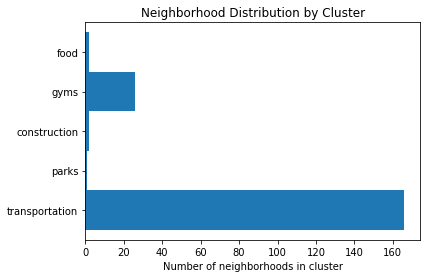

In [45]:

# set bins to be centered at integer values
bins = np.arange(0, clustered_neighborhoods['Cluster Labels'].max() + 1.5) - 0.5

# plot distribution
clustered_neighborhoods['Cluster Labels'].plot(kind="hist", bins=bins, title="Neighborhood Distribution by Cluster", orientation="horizontal")
plt.yticks(np.arange(0, 5, 1), ['transportation', 'parks', 'construction', 'gyms', 'food'])
plt.xlabel('Number of neighborhoods in cluster')
plt.show()

<h4>k-Means clustering (k=5) of Toronto neighborhoods produced reasonable results, grouping neighborhoods roughly by hubs of transportation, food, parks, construction, and gyms. This tells a story about how a financial center of a country has distributed its resources.

This analysis of neighborhood clustering by venue distribution can be extrapolated to any financial center for broader comparison.

One could also consider optimizing radius input in Foursquare API requests.</h4>